# Question 1. Implement LeNet on Cifar-100 dataset
1. Load the cifar 100 dataset. Use the 'coarse' labels.
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100/load_data



In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100

# Load CIFAR-100 dataset with coarse labels
(x_train, y_train_coarse), (x_test, y_test_coarse) = cifar100.load_data(label_mode='coarse')


2. Check if there are 20 labels in y_train using np.unique().

In [8]:
import numpy as np

unique_labels = np.unique(y_train_coarse)
num_labels = len(unique_labels)
print("Number of labels in y_train: ", num_labels)


Number of labels in y_train:  20


3. More information about the dataset could be found here : https://www.cs.toronto.edu/~kriz/cifar.html . Plot the first 25 images from both the train and test data.

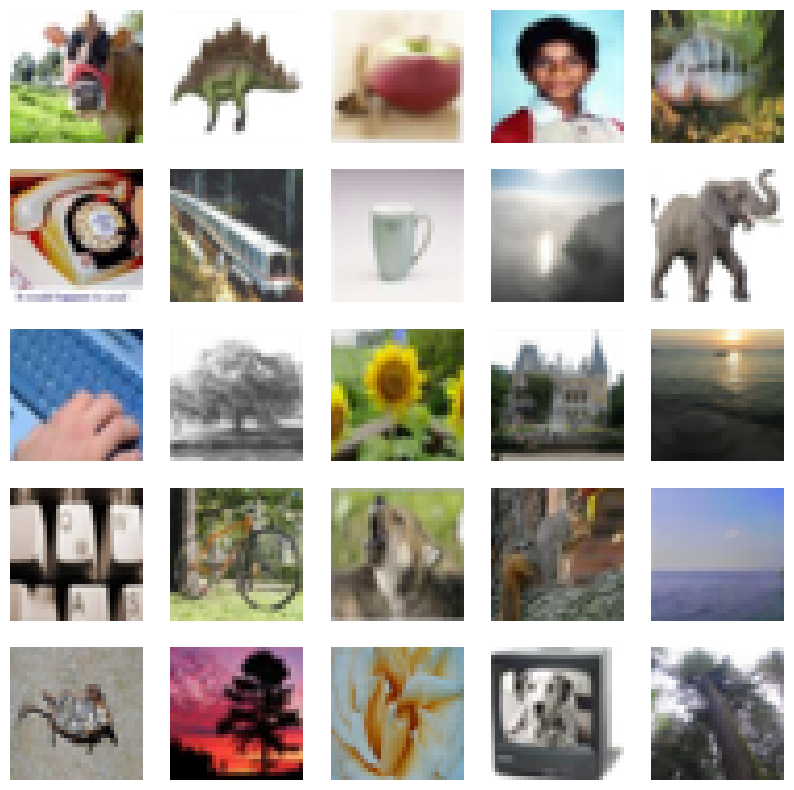

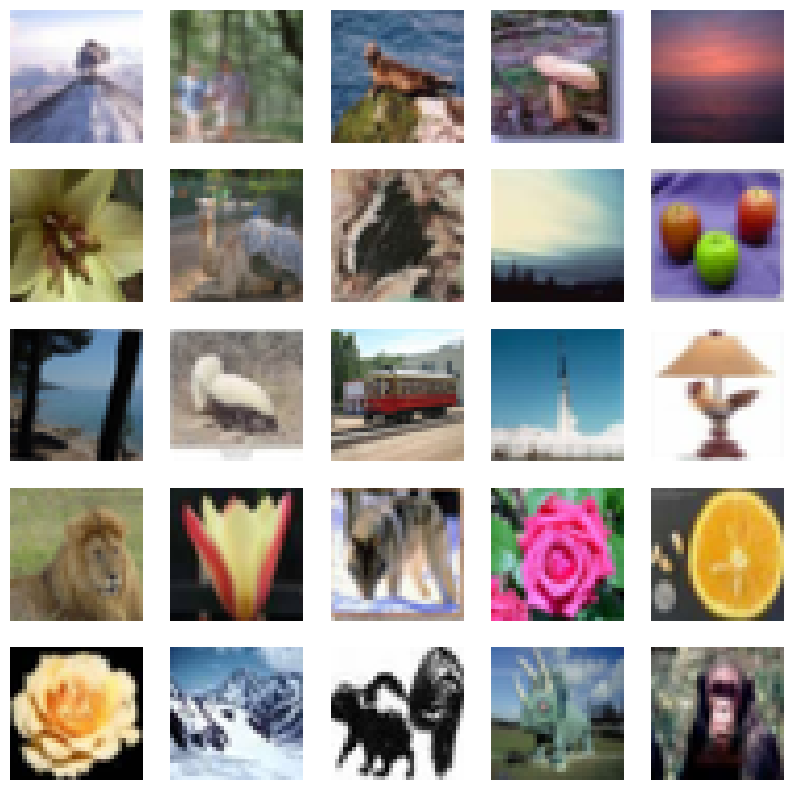

In [15]:
import matplotlib.pyplot as plt

# Plot the first 25 images from train data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

# Plot the first 25 images from test data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')
plt.show()


4. Normalize the data

In [17]:
x_train = x_train / 255.0
x_test = x_test / 255.0


### 5. LeNet

Since the images are of shape (32,32,3) , we can use LeNet architecture. The first difference is that the images are of RGB format and not grayscale.We just need to change the input shape for that.
The second difference is in the number of output classes.

Others remain same.

**Import layers and models from tensorflow.keras and build the LeNet architecture.**

In [19]:
from tensorflow.keras import layers, models

# Build LeNet architecture
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(num_labels, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


It can be seen that the model couldn't achieve a good accuracy. We need to use better models for this task.

# Question 2 : Implement VGGNet - Part 1

Check this website : https://paperswithcode.com/sota/image-classification-on-cifar-100 . It contains information about the best performing models.

We can check the VGGNet-16 model. It consists of 16 layers with weights and some maxpooling layers. The architecture could be in the internet (even in the slides).

VGGNet works on images of size (224,224,3). However, we can implement it on (32,32,3). We will see both the approaches. First let's build VGGNet and train it on original image. Then, we will reshape our images from (32,32,3) to (224,224,3) and train VGGNet on them.

The layers are :

1. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation.
2. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation.
3. MaxPooling . kernel = 2x2. strides = (2,2).
4. Conv layer : 128 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
5. Conv layer : 128 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
6. MaxPooling . kernel = 2x2. strides = (2,2).
7. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
8. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
9. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
10. MaxPooling . kernel = 2x2. strides = (2,2).
11. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
12. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
13. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
14. MaxPooling . kernel = 2x2. strides = (2,2).
15. Flatten Layer.
16. Dense layer of 4096 neurons.
17. Dense layer of 1000 neurons.
18. Dense layer of 20 neurons.


I have omitted the last block of three conv layers of 512 kernels because the output sizes reduces to (1,1,512). You may include it and see.

The order of convolution, batch normalization and relu activation matters. If you do relu activation before normalization, it may happen that your loss fails to backpropagate.

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
(x_train, y_train_coarse), (x_test, y_test_coarse) = cifar100.load_data(label_mode='coarse')
def vgg16(input_shape=(32, 32, 3), num_classes=20):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(layers.Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model



# Create the VGGNet-16 model
model = vgg16(input_shape=(32, 32, 3), num_classes=20)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train_coarse, batch_size=64, epochs=10, validation_data=(x_test, y_test_coarse))




Epoch 1/10
782/782 [==============================] - 36s 37ms/step - loss: 2.5779 - accuracy: 0.2263 - val_loss: 2.3994 - val_accuracy: 0.2607
Epoch 2/10
782/782 [==============================] - 27s 35ms/step - loss: 2.0551 - accuracy: 0.3555 - val_loss: 1.8798 - val_accuracy: 0.4094
Epoch 3/10
782/782 [==============================] - 27s 35ms/step - loss: 1.7424 - accuracy: 0.4459 - val_loss: 1.7844 - val_accuracy: 0.4463
Epoch 4/10
782/782 [==============================] - 27s 35ms/step - loss: 1.5539 - accuracy: 0.5067 - val_loss: 1.5959 - val_accuracy: 0.4941
Epoch 5/10
782/782 [==============================] - 27s 35ms/step - loss: 1.5804 - accuracy: 0.5006 - val_loss: 1.6505 - val_accuracy: 0.4881
Epoch 6/10
782/782 [==============================] - 28s 35ms/step - loss: 1.3966 - accuracy: 0.5537 - val_loss: 1.4393 - val_accuracy: 0.5454
Epoch 7/10
782/782 [==============================] - 29s 37ms/step - loss: 1.2455 - accuracy: 0.5997 - val_loss: 1.6700 - val_accuracy:

Once you are ready with the model, change runtime to GPU and then train the model, else it will take a lot of time to train it on CPU.

Compile the model using SparseCategoricalCrossentropy Loss Function and accuracy metric. Fit it on the train dataset. and evaluate on the test.

In [21]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test_coarse)
print("Test Loss: {:.4f}".format(loss))
print("Test Accuracy: {:.4f}".format(accuracy))

313/313 [==============================] - 3s 9ms/step - loss: 1.5336 - accuracy: 0.5599
Test Loss: 1.5336
Test Accuracy: 0.5599


### Somewhat better !!!

# Question 3 : Implement VGGNet - Part 2


Let's see how the image will look like when it gets resized. The cell already has output. But if you had mistakenly run it, you can correct it by verifying the variable names. The X_train here refers to the original image before normalization.

In [31]:
(X_train, y_train_coarse), (x_test, y_test_coarse) = cifar100.load_data(label_mode='coarse')


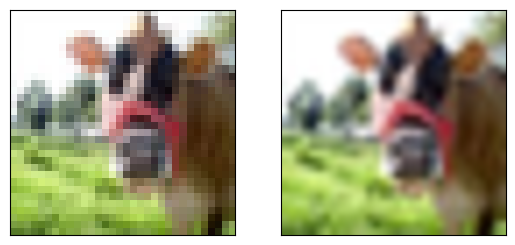

In [32]:

import matplotlib.pyplot as plt
plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(X_train[0])

from PIL import Image
import numpy as np
pil_image = Image.fromarray(X_train[0])
pil_image = np.array(pil_image.resize((224,224)))
plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(pil_image)

To resize the dataset from (32,32,3) to (224,224,3) , you may try out defining a function. Then applying it on the whole dataset at once and store the output. However, you may run out of memory while doing so.

To counter that, we have a simple solution. tf.keras.layers.Resizing which will resize the image to shape (224,224) and then Rescaling to normalize the images if not done earlier. This method won't return error as model.fit process only a small batch at a time (default 32) and not the whole dataset.


Now, start building the model for input image shape of (224,224,3).
Add input layer of (32,32,3) , Resizing, Rescaling, then the whole model (include all the 5 blocks).

Now, if you want to save some time, reduce the number of neurons in the dense layers.

You may also try out using TPU on this one. Check out how to configure TPU.

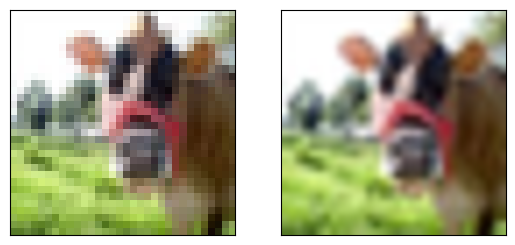

In [33]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(x_train[0])

pil_image = Image.fromarray(x_train[0])
resized_image = pil_image.resize((224, 224))
resized_image = np.array(resized_image)

plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(resized_image)


In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

# Define the model with input shape (224,224,3)
model = models.Sequential()
model.add(layers.Input(shape=(32, 32, 3)))
model.add(layers.Rescaling(1./255))  # Rescale the pixel values if not done earlier
model.add(layers.Resizing(224, 224))

# Load the VGG16 base model without top dense layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.add(base_model)

# Flatten and add custom dense layers for classification
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Question 4 Transfer Learning

In this question, we will implement another CNN architecture on the same dataset. However, we won't build it ourselves. We will use the pre-trained weights of the model already available. This is called Transfer Learning.

Now there are many ways of obtaining those weights : Huggingface, Tensorflow Hub, Pytorch Hub, etc etc etc...

However, we won't look into much details and implement only the models present in keras applications (https://www.tensorflow.org/api_docs/python/tf/keras/applications) .

Choose any of the model and train it on the dataset. As a tutorial, refer to this : https://www.tensorflow.org/tutorials/images/transfer_learning .

The only thing you need to know is what should be the input size for a particular model .

Moreover, since our dataset has only 20 classes and most models returns output of 1000 classes, pass in the parameter **include_top=False** while calling the model. This will return only the convolution layers. Then, you can add custom Dense layers for classification.

In [35]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers

# Load CIFAR-100 dataset with coarse labels
(x_train, y_train_coarse), (x_test, y_test_coarse) = cifar100.load_data(label_mode='coarse')

# Preprocess the data
x_train = tf.keras.applications.vgg16.preprocess_input(x_train)
x_test = tf.keras.applications.vgg16.preprocess_input(x_test)

# Load the VGG16 model without the top dense layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom dense layers for classification
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))

# Compile the model
model.compile(optimizer=optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train_coarse, batch_size=64, epochs=10, validation_data=(x_test, y_test_coarse))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test_coarse)
print("Test Loss: {:.4f}".format(loss))
print("Test Accuracy: {:.4f}".format(accuracy))


Epoch 1/10
782/782 [==============================] - 13s 15ms/step - loss: 3.0046 - accuracy: 0.3957 - val_loss: 1.8439 - val_accuracy: 0.4529
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 1.5626 - accuracy: 0.5178 - val_loss: 1.7292 - val_accuracy: 0.4901
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 1.3586 - accuracy: 0.5707 - val_loss: 1.7080 - val_accuracy: 0.5062
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 1.2353 - accuracy: 0.6030 - val_loss: 1.7592 - val_accuracy: 0.5007
Epoch 5/10
782/782 [==============================] - 10s 12ms/step - loss: 1.1395 - accuracy: 0.6345 - val_loss: 1.7855 - val_accuracy: 0.5019
Epoch 6/10
782/782 [==============================] - 10s 13ms/step - loss: 1.0521 - accuracy: 0.6584 - val_loss: 1.8584 - val_accuracy: 0.5056
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 0.9765 - accuracy: 0.6795 - val_loss: 1.9410 - val_accuracy: